# Jane Chinwuko
# Batch number: DS2307

### Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:
##### 1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
##### 2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
##### 3.	Married - This refers to applicant being in a state of matrimony
##### 4.	Dependents - This refres to persons who depends on the applicants for survival
##### 5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
##### 6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
##### 7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
##### 8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
##### 9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
##### 10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
##### 11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
##### 12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
##### 13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


# This is a binary classification problem

In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
# loaded the dataset to a Pandas DataFrame
loan_predict = pd.read_csv('loan_prediction.csv')

## Exploratory Data Analysis

In [3]:
# Viewing the dimensions of the array
loan_predict.shape

(614, 13)

This dataset contains 614 rows and 13 columns (made up of the independent and target variables)

In [4]:
#Viewing the first 10 rows of the dataset
loan_predict.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


We have both categorical and numerical variables in our dataset.

In [5]:
#Viewing the last 10 rows of the dataset
loan_predict.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#Viewing the columns present in the dataset
columns = loan_predict.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#Displays the basic information about the columns in the dataset
loan_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The datatypes present in our dataset are int64(1 variables), object(8 variables) and float64(4 variables)

In [8]:
#Generating the descriptive statistics of all the features in the dataset
loan_predict.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Our counts are not equal; there are missing values in our data. For the ApplicantIncome, we can see that the mean value 5403.459283 is more than the median value 3812.500000. This shows alot of extreme values.

In [9]:
#displaying the descriptive statistics of our categorical variables
loan_predict.describe(exclude=['float64','int64'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


There are also missing values in our categorical variables. Our target variable, Loan_Status has two categories(Y or N). This is a binary classification problem.

In [10]:
#Dropping the Loan_ID column from the dataset
loan_predict = loan_predict.drop(['Loan_ID'], axis=1) 

We are dropping "Loan_ID" variable because it is just a numerical identifier and does not have any effect on the loan status. 

In [11]:
#This returns the count of unique occurrences in the Education column.
loan_predict['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

We have more applicants that are graduates

In [12]:
#Returns the count of unique occurrences in the Self_Employed column.
loan_predict['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Most of the loan applicants are not self employed. They are probably employed.

In [13]:
#Returns the count of unique occurrences in the Credit_history column.
loan_predict['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

More of the applicants have good credit history

In [14]:
#Returns the count of unique occurrences in the married column.
loan_predict['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

With a count of 398, we can see that the majority of the applicants in the dataset are married. The figure for not married applicants is 213.

In [15]:
#Returns the count of unique occurrences in the Loan_status column.
loan_predict['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

More of the applicants are likely to get the loan approval. Our class is imbalance.

In [16]:
#Returns the count of unique occurrences in the gender column.
loan_predict['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

## Data Visualization

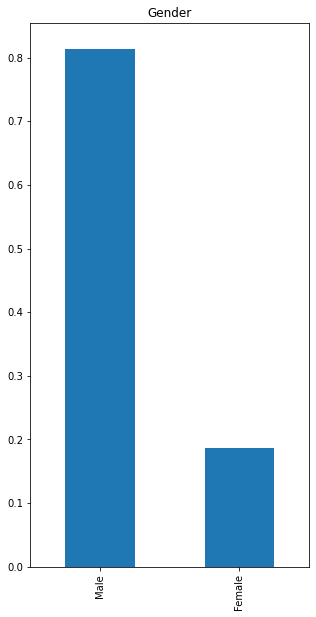

In [17]:
#Barplot to visualize the genders of the applicants
loan_predict['Gender'].value_counts(normalize=True).plot.bar(figsize=(5,10), title='Gender')
plt.show()

About 80% of the applicants are male. We have 489 males and 112 females in our dataset

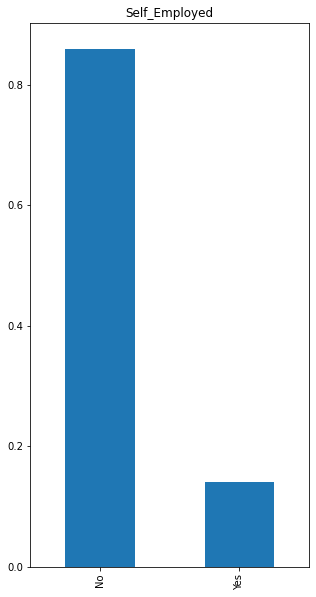

In [18]:
#Barplot to visualize the employment status of the applicants
loan_predict['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(5,10), title='Self_Employed')
plt.show()

We have more applicants that are not self employed. This implies that the majority of loan applicants do not work for themselves.

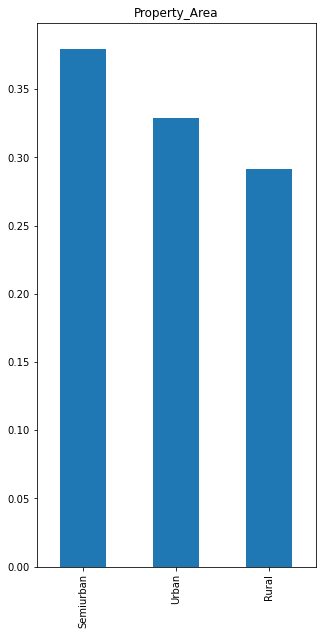

In [19]:
#Barplot to visualize the Property_Area
loan_predict['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(5,10), title='Property_Area')
plt.show()

Most of the properties are located within the Semiurban area

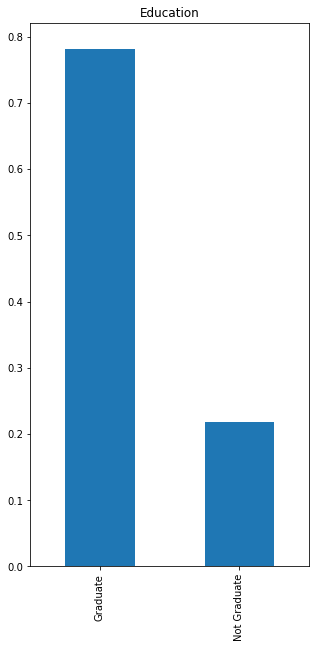

In [20]:
#Barplot to visualize the education status of the applicants
loan_predict['Education'].value_counts(normalize=True).plot.bar(figsize=(5,10), title='Education')
plt.show()

About 78% of the applicants are graduates. This shows that compared to non-graduates, a greater percentage of graduates seek for loans.

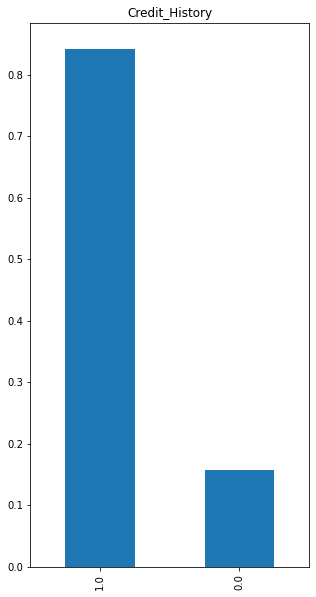

In [21]:
#Barplot to visualize the Credit_History of the applicants
loan_predict['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(5,10), title='Credit_History')
plt.show()

We have two categories here 1 and 0. So we can conclude that 1 indicates that the applicants have credit history while 0 indicates that the applicants do not have credit history. From the counts, we can see that most of the applicants have good credit history. They always paid their debts.

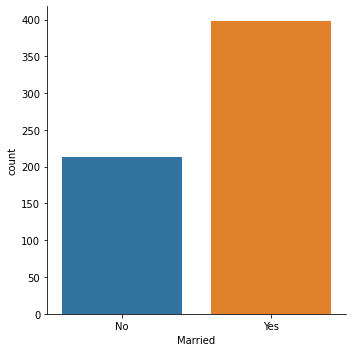

In [22]:
#This catplot shows the count of Marital Status of the applicants.
sns.catplot(x ='Married', data = loan_predict, kind = 'count')

We have more married applicants than single. This implies that married people are more likely than single people to apply for a loan.

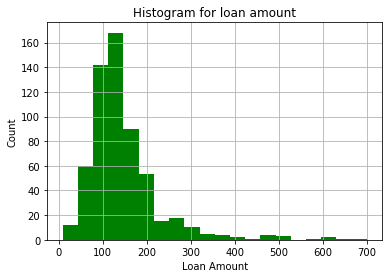

In [23]:
#Histogram for loan amount
plt.hist(loan_predict['LoanAmount'], 20, facecolor='g')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

We can see that the data distribution of the loan amount is skewed to the right. We shall use the log transformation method to reduce this skewness.

<function matplotlib.pyplot.show(close=None, block=None)>

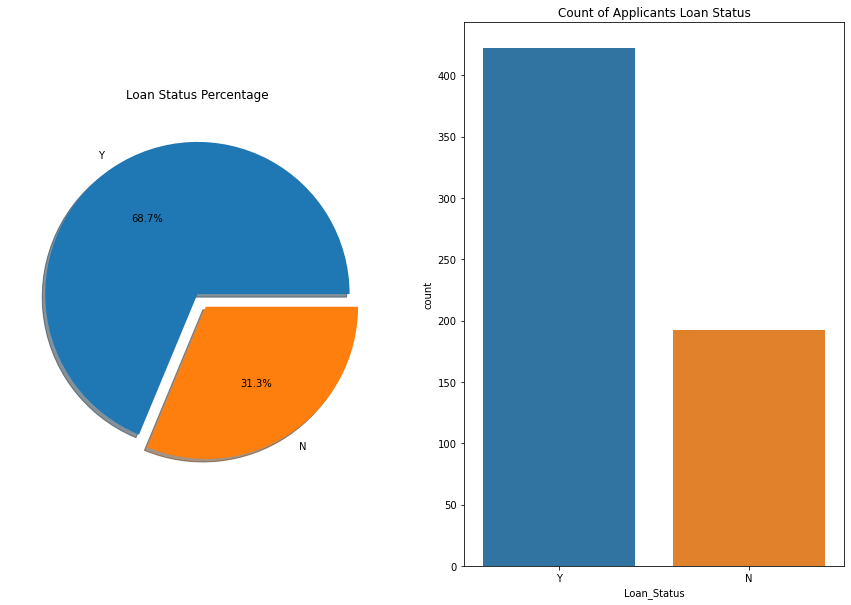

In [24]:
#This pieplot shows the percentage of the survivals
f, ax = plt.subplots(1,2, figsize = (15,10))
loan_predict['Loan_Status'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('Loan Status Percentage')
ax[0].set_ylabel('')

#This countplot shows the distribution of the passenger whether they survived or not
sns.countplot(x ='Loan_Status', data = loan_predict,  ax = ax[1])
ax[1].set_title('Count of Applicants Loan Status')
plt.show

68.7% of the applicants had their loans approved. Our count shows our target variable classes are imbalance.

<AxesSubplot:>

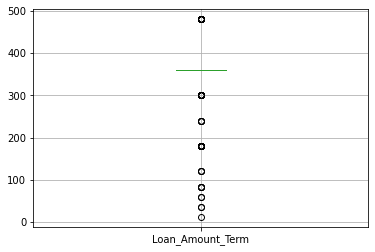

In [25]:
#Boxplot of the column Loan_Amount_term
loan_predict.boxplot(column='Loan_Amount_Term')

<AxesSubplot:>

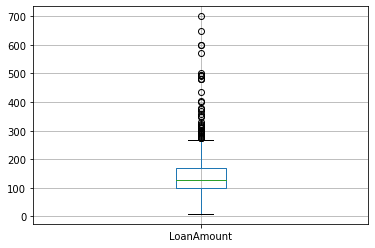

In [26]:
#Boxplot on LoanAmount
loan_predict.boxplot(column='LoanAmount')

C:\Users\Omen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Omen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

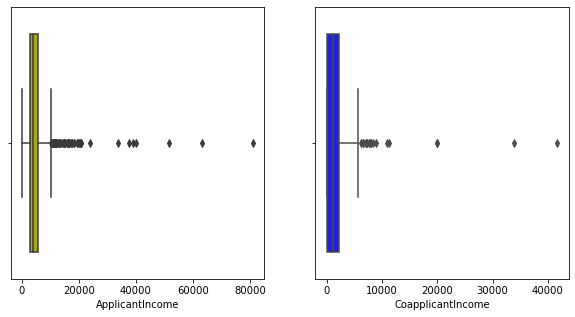

In [27]:
# boxplot showing the disposable income available for the applicant's and those that participate in the loan application
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(loan_predict['ApplicantIncome'],color='y')
plt.subplot(1,2,2)
sns.boxplot(loan_predict['CoapplicantIncome'],color='b')

From the boxplots above, we can see that there are outliers in Loan_Amount_Term, LoanAmount, ApplicantIncome and CoapplicantIncome.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

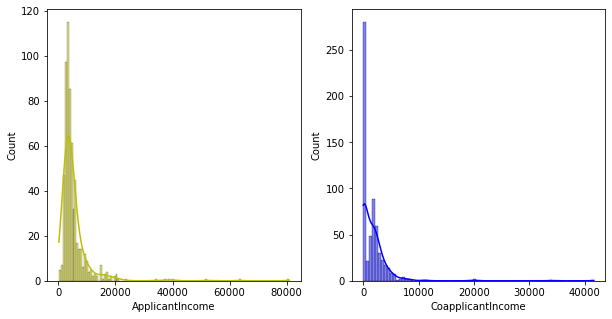

In [28]:
# histplot showing the disposable income available for the applicant's and those that participate in the loan application
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(loan_predict['ApplicantIncome'],kde=True,color='y')
plt.subplot(1,2,2)
sns.histplot(loan_predict['CoapplicantIncome'],kde=True,color='b')

We can see that the data distribution of both ApplicantIncome and CoapplicantIncome are skewed to the right. To reduce this skewness, we shall be using the log transformation method. 

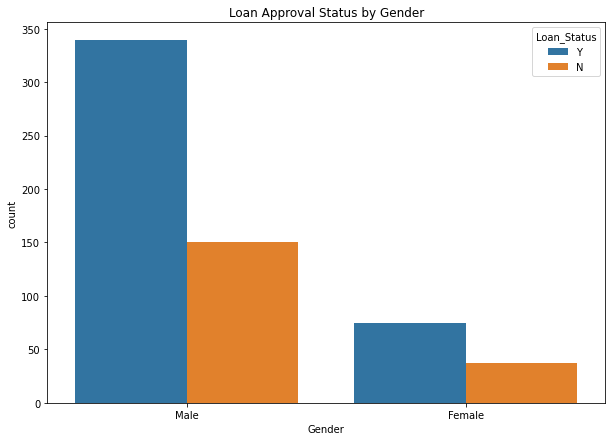

In [29]:
#countplot showing the relationship of feature with loan status
plt.figure(figsize=(10,7))
sns.countplot(x='Gender', hue='Loan_Status', data=loan_predict)
plt.title('Loan Approval Status by Gender')
plt.show()


The male applicants are more likely to get loan approvals.

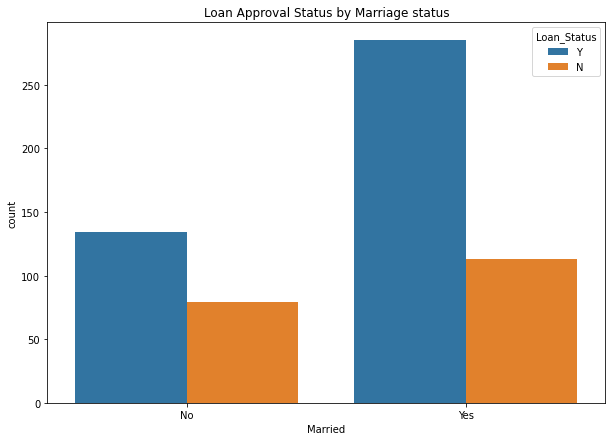

In [30]:
#countplot showing the relationship of feature with loan status
plt.figure(figsize=(10,7))
sns.countplot(x='Married', hue='Loan_Status', data=loan_predict)
plt.title('Loan Approval Status by Marriage status')
plt.show()

Those applicants who are married are more likely to get loan approvals.

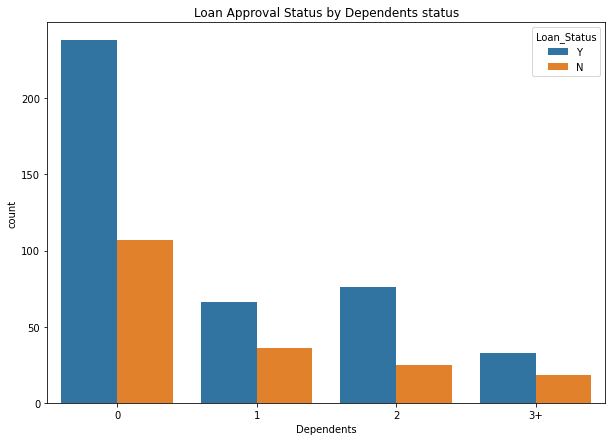

In [31]:
#countplot showing the relationship of feature with loan status
plt.figure(figsize=(10,7))
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_predict)
plt.title('Loan Approval Status by Dependents status')
plt.show()

Applicants who do not have dependents are more likely to get their loans approved.

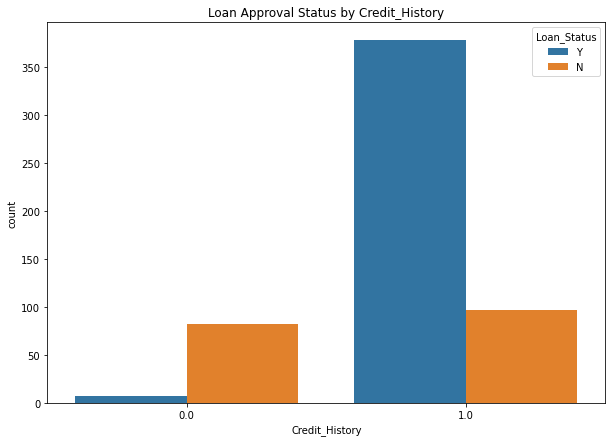

In [32]:
#countplot showing the relationship of feature with loan status
plt.figure(figsize=(10,7))
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_predict)
plt.title('Loan Approval Status by Credit_History')
plt.show()

We can see from the plot that about 100 applications who did not have a credit history did not have their loan approved. This column could be significant in the loan approval prediction model since it's feasible that having or not having a credit history could affect loan approval.

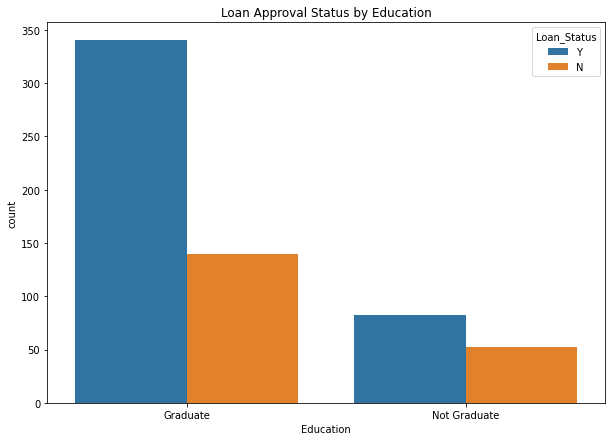

In [33]:
#countplot showing the relationship of feature with loan status
plt.figure(figsize=(10,7))
sns.countplot(x='Education', hue='Loan_Status', data=loan_predict)
plt.title('Loan Approval Status by Education')
plt.show()

Looking at the countplot, we can say that applicants who are graduate have a higher chance of having their loan approved than those who are not graduates. This may suggest that qualifying for a loan may depend on one's educational background.

## Data Pre-Processing

### Treating missing values

In [34]:
#Checking for null values in the dataset
loan_predict.apply(lambda x: sum(x.isnull()), axis=0)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
#Filling in missing values in the LoanAmount column by mean
loan_predict['LoanAmount'].fillna(loan_predict['LoanAmount'].mean(), inplace = True)

#Filling the null values in the column Self_Employed with the value 'No'
loan_predict['Self_Employed'].fillna('No', inplace=True)

#0:gets the mode of each column and fill in the missing values
loan_predict['Gender'].fillna(loan_predict['Gender'].mode()[0], inplace = True)
loan_predict['Married'].fillna(loan_predict['Married'].mode()[0], inplace = True)
loan_predict['Dependents'].fillna(loan_predict['Dependents'].mode()[0], inplace = True)
loan_predict['Loan_Amount_Term'].fillna(loan_predict['Loan_Amount_Term'].mode()[0], inplace = True)
loan_predict['Credit_History'].fillna(loan_predict['Credit_History'].mode()[0], inplace = True)


In [36]:
#Checking the dataset after removing null values
loan_predict.apply(lambda x: sum(x.isnull()), axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Transformation

In [37]:
#import Label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

#Converted all categorical values to number
#Selects the columns that are not integer
columns = list(loan_predict.select_dtypes(exclude=['float64','int64']))
le = LabelEncoder()
for i in columns:
 #print(i)
 loan_predict[i] = le.fit_transform(loan_predict[i])
loan_predict.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

Text(0.5, 1.0, 'Correlation Heatmap')

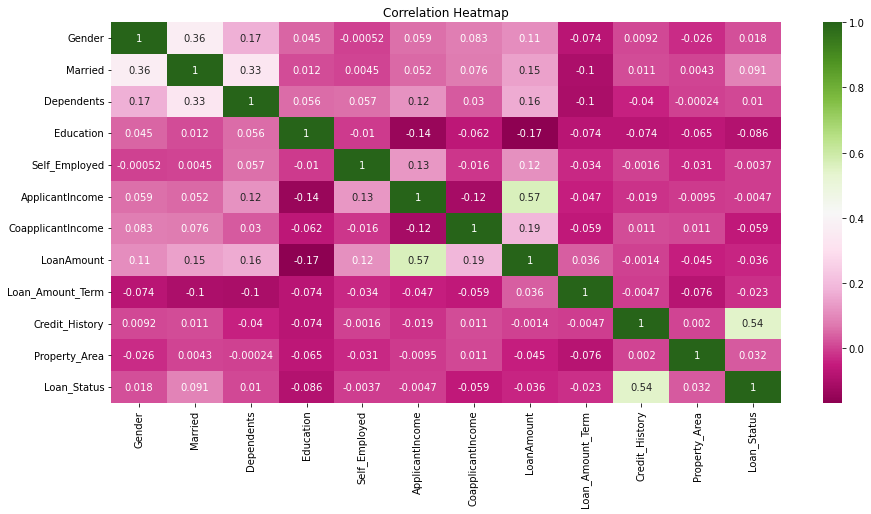

In [38]:
# Using heatmap to visualize the correlation between the features.
plt.figure(figsize=(15,7))
sns.heatmap(loan_predict.corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')

The above heatmap showes that there is a positive correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

### Checking for Skewness

<AxesSubplot:>

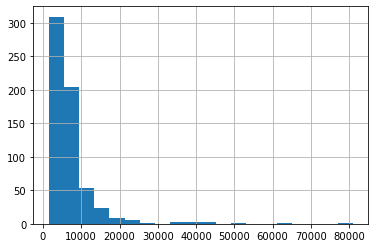

In [39]:
# Add both ApplicantIncome and CoapplicantIncome to form another feature called TotalIncome
loan_predict['TotalIncome'] = loan_predict['ApplicantIncome'] + loan_predict['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
loan_predict['TotalIncome'].hist(bins=20)


We added the ApplicantIncome and CoapplicantIncome to form another feature called TotalIncome. From the distribution of the combined data, we can see that it is rightly skewed. We shall use the log transformation method to reduce the skewness.

In [40]:
# Perform log transformation of TotalIncome to make it closer to normal
loan_predict['TotalIncome_log'] = np.log(loan_predict['TotalIncome'])

<AxesSubplot:>

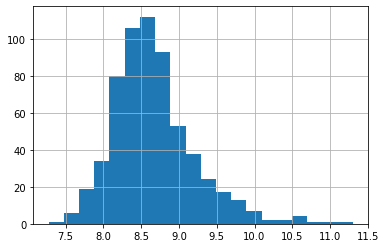

In [41]:
#Histogram of the loanAmount_log
loan_predict['TotalIncome_log'].hist(bins = 20)

We used the log transformation method to reduce the skewness in our TotalIncome column. The distribution of our data is now normal.

<AxesSubplot:>

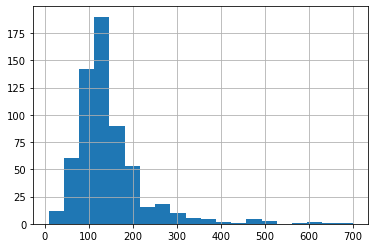

In [42]:
# Looking at the distribtion of TotalIncome
loan_predict['LoanAmount'].hist(bins=20)

From the data distribution of our LoanAmount column, we can see that it is rightly skewed. We shall use the log transformation method to reduce the skewness.

In [43]:
#Building log transformation for loanAmount
loan_predict['LoanAmount_log'] = np.log(loan_predict['LoanAmount'])

<AxesSubplot:>

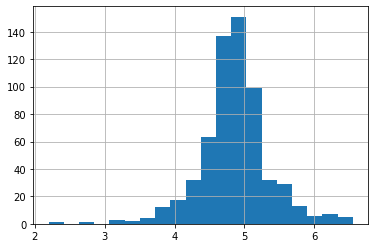

In [44]:
#Histogram of the loanAmount_log
loan_predict['LoanAmount_log'].hist(bins = 20)

We used the log transformation method to reduce the skewness in our LoanAmount column. The distribution of our data is now normal.

In [45]:
#Drop ApplicantIncome and CoapplicantIncome from the dataset as we have transformed both of them
loan_predict = loan_predict.drop(['ApplicantIncome','CoapplicantIncome'], axis=1) 

We dropped the ApplicantIncome and 'CoapplicantIncome column since we merged them to form a new column TotalIncome.

In [46]:
#Viewing the first 10 rows of the dataset
loan_predict.head(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0,8.674026,4.986426
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0,8.714568,4.852030
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0,8.006368,4.189655
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0,8.505323,4.787492
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0,8.699515,4.948760
5,1,1,2,0,1,267.000000,360.0,1.0,2,1,9613.0,9.170872,5.587249
6,1,1,0,1,0,95.000000,360.0,1.0,2,1,3849.0,8.255569,4.553877
7,1,1,3,0,0,158.000000,360.0,0.0,1,0,5540.0,8.619750,5.062595
8,1,1,2,0,0,168.000000,360.0,1.0,2,1,5532.0,8.618305,5.123964
9,1,1,1,0,0,349.000000,360.0,1.0,1,0,23809.0,10.077819,5.855072


In [47]:
#checking the VIF value for multicollinearity between our variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X_input):
# Calculating VIF
    vif_df = pd.DataFrame()
    vif_df["Variables"] = X_input.columns
    vif_df["VIF Value"] = [variance_inflation_factor(X_input.values, i) for i in range(X_input.shape[1])]

    return(vif_df)
X = loan_predict.iloc[:,:]
calc_vif(X)

,Variables,VIF Value
0,Gender,6.488597
1,Married,3.745068
2,Dependents,1.798538
3,Education,1.356851
4,Self_Employed,1.188282
5,LoanAmount,22.298483
6,Loan_Amount_Term,30.334915
7,Credit_History,9.807281
8,Property_Area,2.759494
9,Loan_Status,4.616429


In [48]:
#Dropping density(has highest vif value)
X = loan_predict.drop(['LoanAmount_log','TotalIncome_log'],axis=1)

calc_vif(X)

,Variables,VIF Value
0,Gender,5.987803
1,Married,3.687257
2,Dependents,1.791168
3,Education,1.310840
4,Self_Employed,1.173388
5,LoanAmount,6.857643
6,Loan_Amount_Term,10.333130
7,Credit_History,9.031343
8,Property_Area,2.577053
9,Loan_Status,4.602289


We dropped the LoanAmount_log and TotalIncome_log as they had a high VIF value. 

In [49]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.000000,0.273231,0.411733,1.223298,0.674519,-0.182184
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.219273,0.273231,0.411733,-1.318513,-1.482537,-0.144684
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.957641,0.273231,0.411733,1.223298,0.674519,-0.623656
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.314547,0.273231,0.411733,1.223298,0.674519,-0.322885
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,-0.064454,0.273231,0.411733,1.223298,0.674519,-0.158785
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.898095,0.273231,0.411733,-1.318513,0.674519,-0.639152
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-1.267279,-2.522836,0.411733,-1.318513,0.674519,-0.452274
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.269371,0.273231,0.411733,1.223298,0.674519,0.199475
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.483367,0.273231,0.411733,1.223298,0.674519,0.086512


 We used StandardScaler to scale our variables so that they have a similar scale. 

In [50]:
# selecting our dependent variable (label) and target variable (y)
x = loan_predict.drop('Loan_Status',axis=1)
y = loan_predict['Loan_Status']

We dropped the Loan_Status variable which is our target variable from the list of features in our dataset. We are going to be predicting the Loan_Status of the applicants using our independent variables. 

In [51]:
#Using SMOTE algorithm to balance the quality variable
oversam = SMOTE()
X_resam, y_resam = oversam.fit_resample(x, y)
y_resam.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

Our class counts are now balanced.

# Model Building

In [52]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resam, y_resam, test_size = 0.20, random_state = 42)
#viewing the dimension of our train and test variales for our independent and target variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((675, 12), (169, 12), (675,), (169,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 80% of our data will be used to train the model while 20% will be used for model validation.

## 1. Decision Tree

In [53]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Decision Tree: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)


The Accuracy for Decision Tree: 0.76


[[69 25]
 [16 59]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        94
           1       0.70      0.79      0.74        75

    accuracy                           0.76       169
   macro avg       0.76      0.76      0.76       169
weighted avg       0.76      0.76      0.76       169



### Cross Validation Score for Decision Tree

In [54]:
# Specify the cross-validation strategy
results = []

scores = cross_val_score(dt, X_train, y_train,cv=5)
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Decision Tree',accuracy, mean_score, diff])

Cross-validation scores: [0.74814815 0.78518519 0.73333333 0.82962963 0.75555556]
Mean accuracy: 0.77


The difference between the accuracy score and the cross validation score is: -0.012973920666228378


## 2. Random Forest

In [55]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 0.77


[[67 27]
 [12 63]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        94
           1       0.70      0.84      0.76        75

    accuracy                           0.77       169
   macro avg       0.77      0.78      0.77       169
weighted avg       0.78      0.77      0.77       169



#### Cross Validation Score for Random Forest

In [56]:

scores = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [0.79259259 0.83703704 0.77777778 0.86666667 0.82222222]
Mean accuracy: 0.82


The difference between the accuracy score and the cross validation score is: -0.05002849002849008


## 3. Xgboost Classifier

In [57]:
# Create a Xgboost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"The Accuracy for Xgboost Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Xgboost Classifier is:  0.7869822485207101


[[71 23]
 [13 62]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        94
           1       0.73      0.83      0.77        75

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.79      0.79      0.79       169



#### Cross Validation Score for Xgboost Classifier

In [58]:

scores = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Xgboost Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.78518519 0.85185185 0.8        0.91111111 0.77037037]
Mean accuracy: 0.82


The difference between the accuracy score and the cross validation score is: -0.036721455182993634


## 4. Gradient Boosting Classifier

In [59]:
# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"The Accuracy for Gradient Boosting Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_gb)
print(confusion_matrix(y_test, y_pred_gb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Gradient Boosting Classifier is:  0.7396449704142012


[[62 32]
 [12 63]]


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        94
           1       0.66      0.84      0.74        75

    accuracy                           0.74       169
   macro avg       0.75      0.75      0.74       169
weighted avg       0.76      0.74      0.74       169



### Cross Validation Score for Gradient Boosting Classifier

In [60]:

scores = cross_val_score(gb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Gradient Boosting Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.77037037 0.82962963 0.78518519 0.85925926 0.78518519]
Mean accuracy: 0.81


The difference between the accuracy score and the cross validation score is: -0.06628095551172486


## 5. Adaboost classifier

In [61]:
# Create a Adaboost Classifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_ab)
print(f"The Accuracy for Adaboost classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_ab)
print(confusion_matrix(y_test, y_pred_ab))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Adaboost classifier is:  0.757396449704142


[[64 30]
 [11 64]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76        94
           1       0.68      0.85      0.76        75

    accuracy                           0.76       169
   macro avg       0.77      0.77      0.76       169
weighted avg       0.78      0.76      0.76       169



### Cross Validation Score for Adaboost classifier

In [62]:
scores = cross_val_score(ab, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Adaboost classifier',accuracy, mean_score, diff])

Cross-validation scores: [0.73333333 0.76296296 0.76296296 0.82222222 0.8       ]
Mean accuracy: 0.78


The difference between the accuracy score and the cross validation score is: -0.018899846592154268


In [63]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Decision Tree,0.757396,0.770370,-0.012974
1,Random Forest,0.769231,0.819259,-0.050028
2,Xgboost Classifier,0.786982,0.823704,-0.036721
3,Gradient Boosting Classifier,0.739645,0.805926,-0.066281
4,Adaboost classifier,0.757396,0.776296,-0.018900


The cross validation score is greater than the accuracy score; reason for the negative results obtained for the difference.

In [64]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the Gradient Boosting Classifier


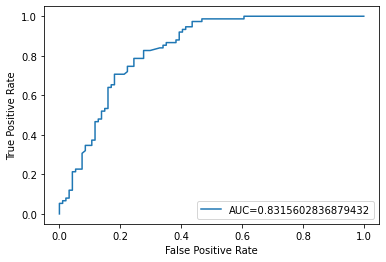

In [65]:
#ROC plot of the best model
import sklearn.metrics as metrics
#define metrics
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the ROC curve above, we can see that the AUC value for our best model is 83%

In [66]:
#Search for the best hyperparameter for model tuning RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

model_best = GradientBoostingClassifier()

model_param = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7],
    'min_samples_leaf':[1,2,3]
           }

In [67]:
from sklearn.model_selection import RandomizedSearchCV
gd_search = RandomizedSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'max_features': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 3],
                                        'n_estimators': [10, 100, 200]})

In [68]:
#display the best parameters from the search

print("The best max_depth is : " + str(gd_search.best_params_["max_depth"]),
     "\nThe best n_estimators: " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best max_features: " + str(gd_search.best_params_["max_features"]),
      "\nThe best min_samples_leaf: " + str(gd_search.best_params_["min_samples_leaf"]))

The best max_depth is : 5 
The best n_estimators: 200 
The best max_features: 1 
The best min_samples_leaf: 3


In [69]:
# train the model with the selected parameters
loan_model = GradientBoostingClassifier(max_depth =5, n_estimators  = 200, max_features =1, min_samples_leaf = 3)
loan_model.fit(X_train, y_train)
y_pred = loan_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7928994082840237

In [70]:
import pickle
# save the model to disk
filename = 'loan_prediction.sav'
pickle.dump(loan_model, open(filename, 'wb'))

In [71]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

#converting the values of our loan status back to yes and no.
accuracy_dataframe = accuracy_dataframe.replace({0: 'No', 1: 'Yes'})
accuracy_dataframe

,y_test,y_pred
493,Yes,Yes
215,Yes,Yes
622,No,No
737,No,No
63,No,No
...,...,...
351,No,No
445,Yes,Yes
750,No,No
198,Yes,Yes


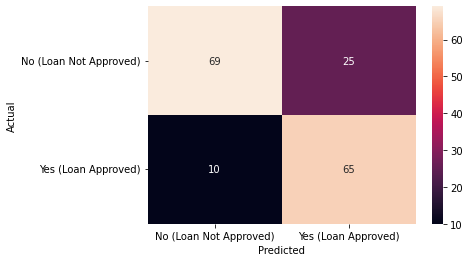

In [72]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
label=['No (Loan Not Approved)', 'Yes (Loan Approved)']
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=label, yticklabels=label,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Conclusion

This is a binary classification problem because the target variable is classified into two categories (no or yes). We used the loan prediction dataset to analyse whether the loan of the applicant will be approved or not based on the features provided. The dataset is made up 614 rows and 13 columns. Of these columns, we have 12 independent variables and 1 target variable(Loan_Status). We visualized the relationships between some features. 
#### Some of the observations recorded were:
##### 1) We have more applicants that are graduates
##### 2) Most of the loan applicants are not self employed.
##### 3) More of the applicants have good credit history
##### 4) About 80% of the applicants are male.

We pre-processed our data by treating the missing values in the dataset using the mean, mode and filling methods. We also treated skewness using the log transformation method. We used the VIF method to check for multicollinearity. We dropped the features having high VIF values. We balanced our target variable class using the SMOTE algorithm.
After cleaning our data, we splitted our data into train and test. 80% of the data was used for taining while 20% was used for validation. We used different algorithms to train our model. The criteria we used in the selection of best model is accuracy and cross validation score. We calculated the difference between the accuracy and cross validation scores and selected the algorithm that had the lowest result. We observed that the result of the substraction for all the algorithms used were negative. This means that the cross validation scores were more that the accuracy scores for all the models used.
Gradient Boosting Classifier was selected as our best model because it had a lower difference between accuracy and cross validation score. The accuracy score before tuning was 0.739645 and after tuning using the Randomized Search CV set parameters, the model's accuracy increased to 0.79289. There was an improvement in the accuracy after tuning. Testing the performance of the model, we can see that from the 10 predictions made, the model was able to predict all correctly. We can also see from the confusion matrix that the model predicted that 69 will not get their loan approved and actually the loans were not approved(True Negative). It predicted 65 will get their loan approved and they did get loan approval(True Positive). The model predicted that 10 will not get their loan approved whereas, they did get loan approval(False Negative). Predicted 25 will get their loan approved but they did not get their loan approved(False Positive).